## Thu thập dữ liệu 
### Bài toán: Phân tích và dự đoán căn hộ tại Hà Nội

- Nguồn dữ liệu: https://123nhadatviet.com
- Công cụ thu thập: Ngôn ngữ python (thư viện BeautifulSoup)

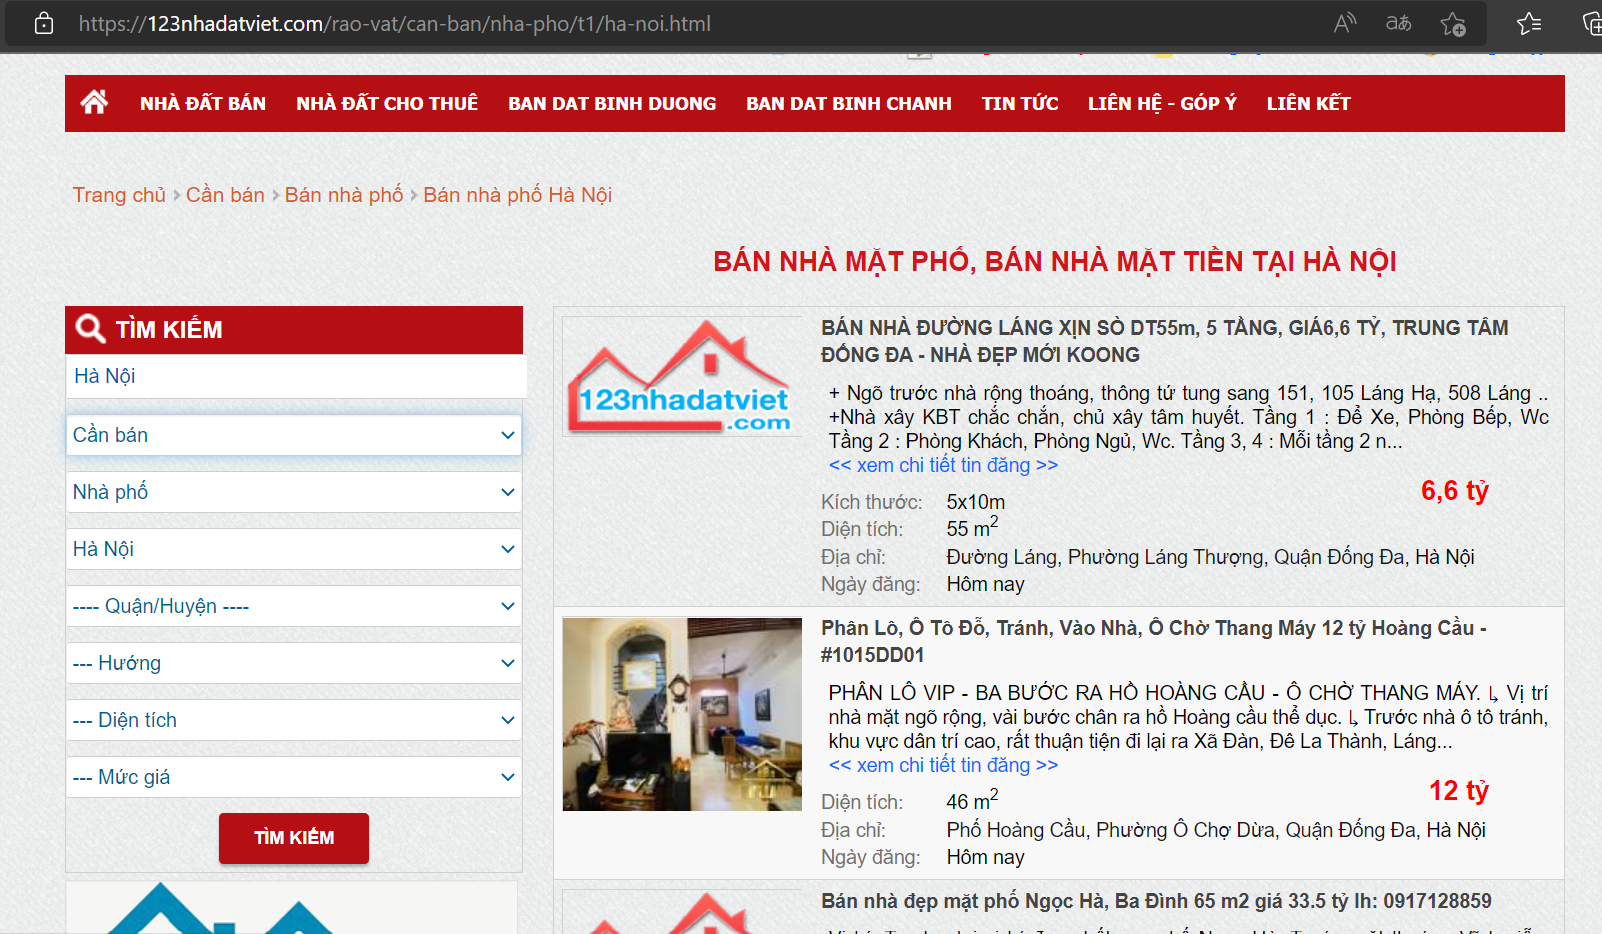

In [12]:
from IPython.display import Image
Image(filename='123.png')


- Mô tả dữ liệu: Thông tin căn hộ ở Hà Nội.
    - addr: Địa chỉ bán
    - area: Diện tích ($m^2$)
    - price: Giá bán
    - room: Số lượng phòng trong căn hộ
    - floor: Số lầu của căn hộ
    - buildingLine: Lộ giới 

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [24]:
# Tạo lớp Content với các attributes là các trường
class Content:
    def __init__(self,addr, area,price, room, floor,buildingLine):
        self.addr = addr
        self.area = area
        self.price = price
        self.room = room
        self.floor = floor
        self.buildingLine=buildingLine

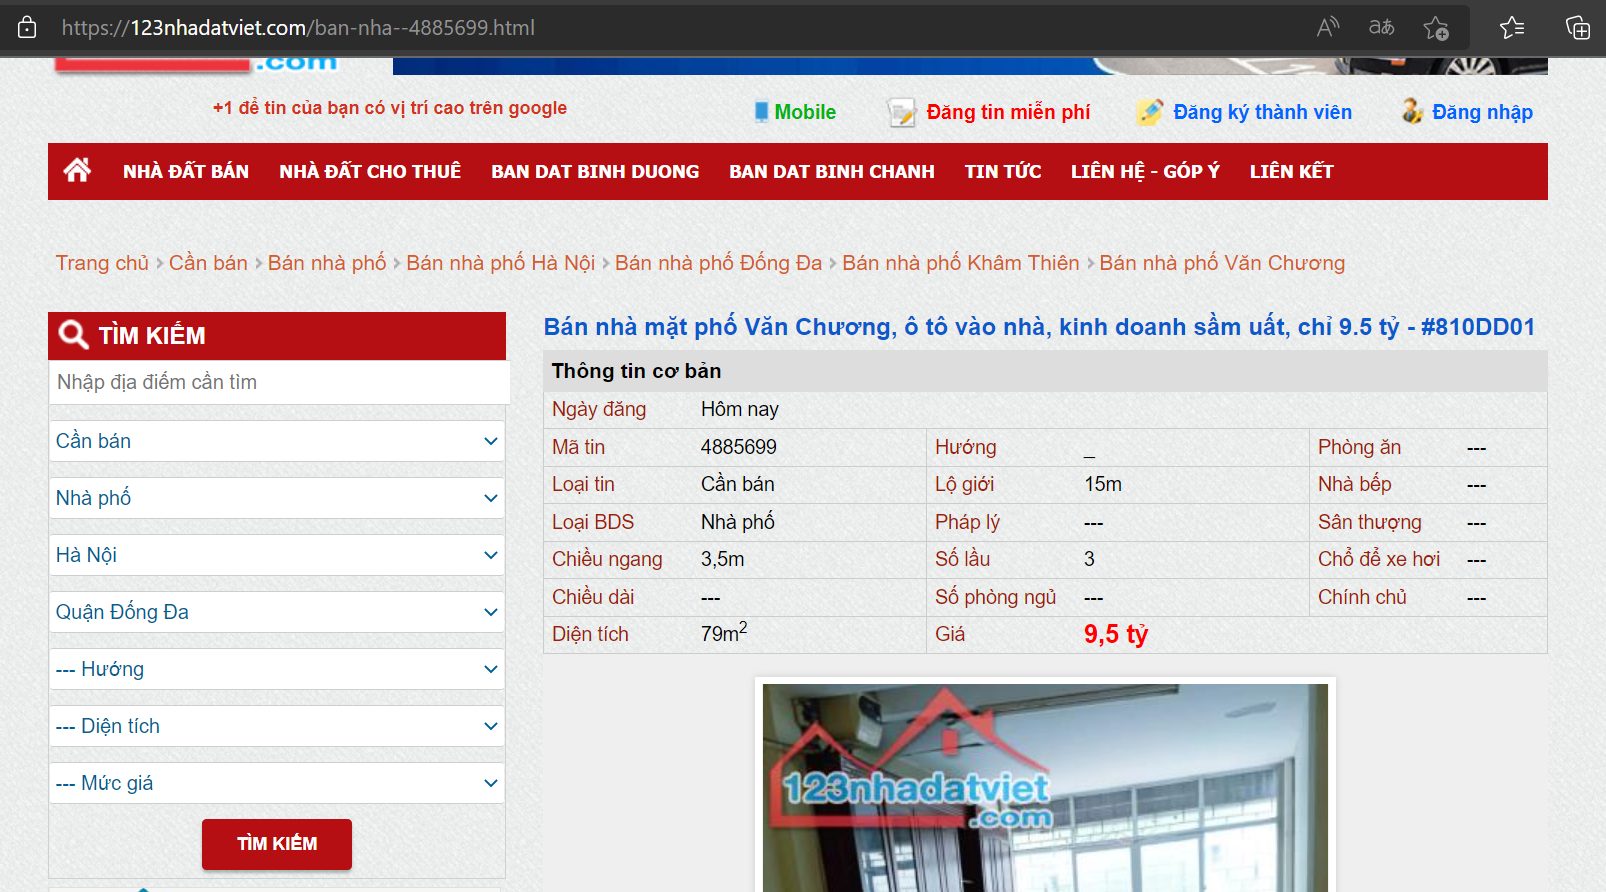

In [25]:
Image(filename='detail.png')

In [26]:
def get(url):
    html =  urlopen('https://123nhadatviet.com'+url)
    bs = BeautifulSoup(html, "html.parser")
    
    link=bs.find('div',{'class':'infor'})
    link = link.findAll('tr')
    area= link[6].findAll('td')[1].get_text() 
    price= link[6].findAll('td')[3].get_text() 
    floor = link[4].findAll('td')[3].get_text() 
    room = link[5].findAll('td')[3].get_text()
    buildingLine=link[2].findAll('td')[3].get_text()
    link=bs.find('div',{'class':'contact'})
    addr = link.find('span',{'class':'value'}).get_text()
    
    return Content(addr,area,price,floor,room,buildingLine)


In [ ]:
arr_url=[] 
arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/nha-pho/t1/ha-noi.html')
arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/nha-rieng/t1/ha-noi.html')
arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/biet-thu-lien-ke/t1/ha-noi.html')

for i in range(2,42):
    arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/nha-pho/t1/ha-noi/'+'trang--'+str(i)+'.html')
for i in range(2,42):
    arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/nha-rieng/t1/ha-noi/'+'trang--'+str(i)+'.html')
for i in range(2,42):
    arr_url.append('https://123nhadatviet.com/rao-vat/can-ban/biet-thu-lien-ke/t1/ha-noi/'+'trang--'+str(i)+'.html')

arr=[]
for i in range(len(arr_url)):
                html = urlopen(arr_url[i])
                bs = BeautifulSoup(html, "html.parser")
                print(arr_url[i])
                for i in range(20):
                    try:
                        link=bs.findAll('div',{'class':'content-item'})[i]             
                        b=get(link.find('a').attrs['href'])
                        arr.append(b)              
                    except:
                        print("Something went wrong")
            
import csv
with open('rawdata.csv', mode='w', encoding="utf-8") as csv_file:
        
        fieldnames = ['address', 'area', 'price', 'floor', 'room','buildingLine']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        
        for i in range(len(arr)):
            writer.writerow({ 'address':arr[i].addr, 'area':arr[i].area, 'price':arr[i].price, 'floor':arr[i].floor, 'room':arr[i].room,'buildingLine':arr[i].buildingLine})

In [14]:
df = pd.read_csv('rawdata.csv')
pd.options.mode.chained_assignment = None  # default='warn' 
df 

,address,area,price,floor,room,buildingLine
0,"Phố Hoàng Cầu, Phường Ô Chợ Dừa, Quận Đống ...",46m2,12 tỷ,4,4,8m
1,"Đường Lĩnh Nam, Phường Lĩnh Nam, Quận Hoàng M...",36m2,"2,6 tỷ",4,5,4m
2,"Đường Văn Chương, Phường Khâm Thiên, Quận Đốn...",79m2,"9,5 tỷ",---,3,15m
3,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long...",350m2,58 tỷ,1,2,40m
4,"Đường 800A, Phường Nghĩa Đô, Quận Cầu Giấy, H...",49m2,"15,3 tỷ",4,4,12m
...,...,...,...,...,...,...
2445,"Đường Võ Chí Công, Phường Nhật Tân, Quận Tây ...",155m2,"23,5 tỷ",5,4,3m
2446,"Đường Xuân La, Phường Xuân La, Quận Tây Hồ, H...",245m2,32 tỷ,6,4,6m
2447,"Phố Trích Sài, Phường Bưởi, Quận Tây Hồ, Hà Nội",140m2,"19,5 tỷ",5,4,8m
2448,"Đường Nguyễn Văn Huyên, Phường Xuân Tảo, Quận...",70m2,"16,5 tỷ",5,4,15m
